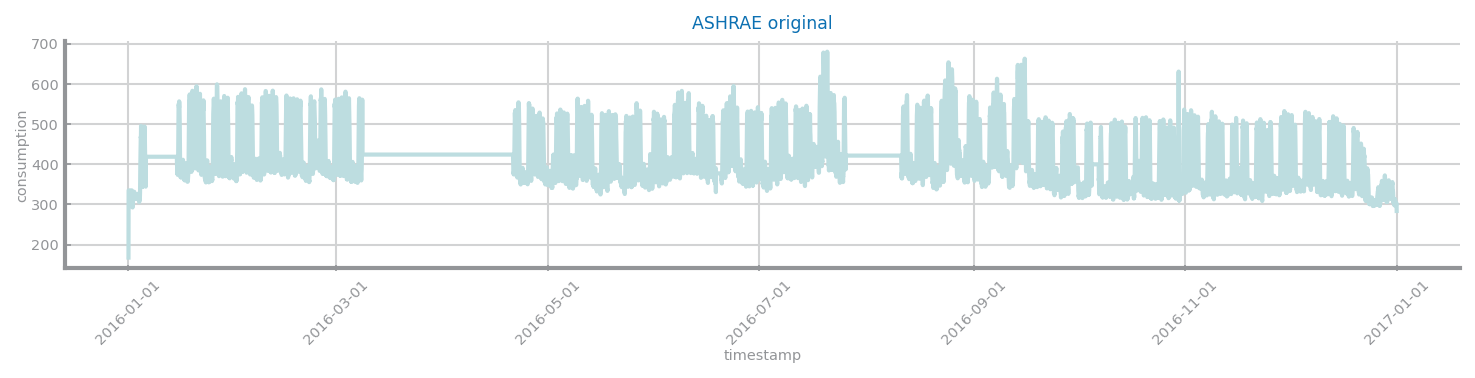

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts
import ds_functions as ds

data = pd.read_csv('ashrae_single.csv', index_col='timestamp', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

x_label='timestamp'
y_label='consumption'
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(data, x_label=x_label, y_label=y_label, title='ASHRAE original')
plt.xticks(rotation = 45)
plt.show()

<Figure size 1800x300 with 0 Axes>

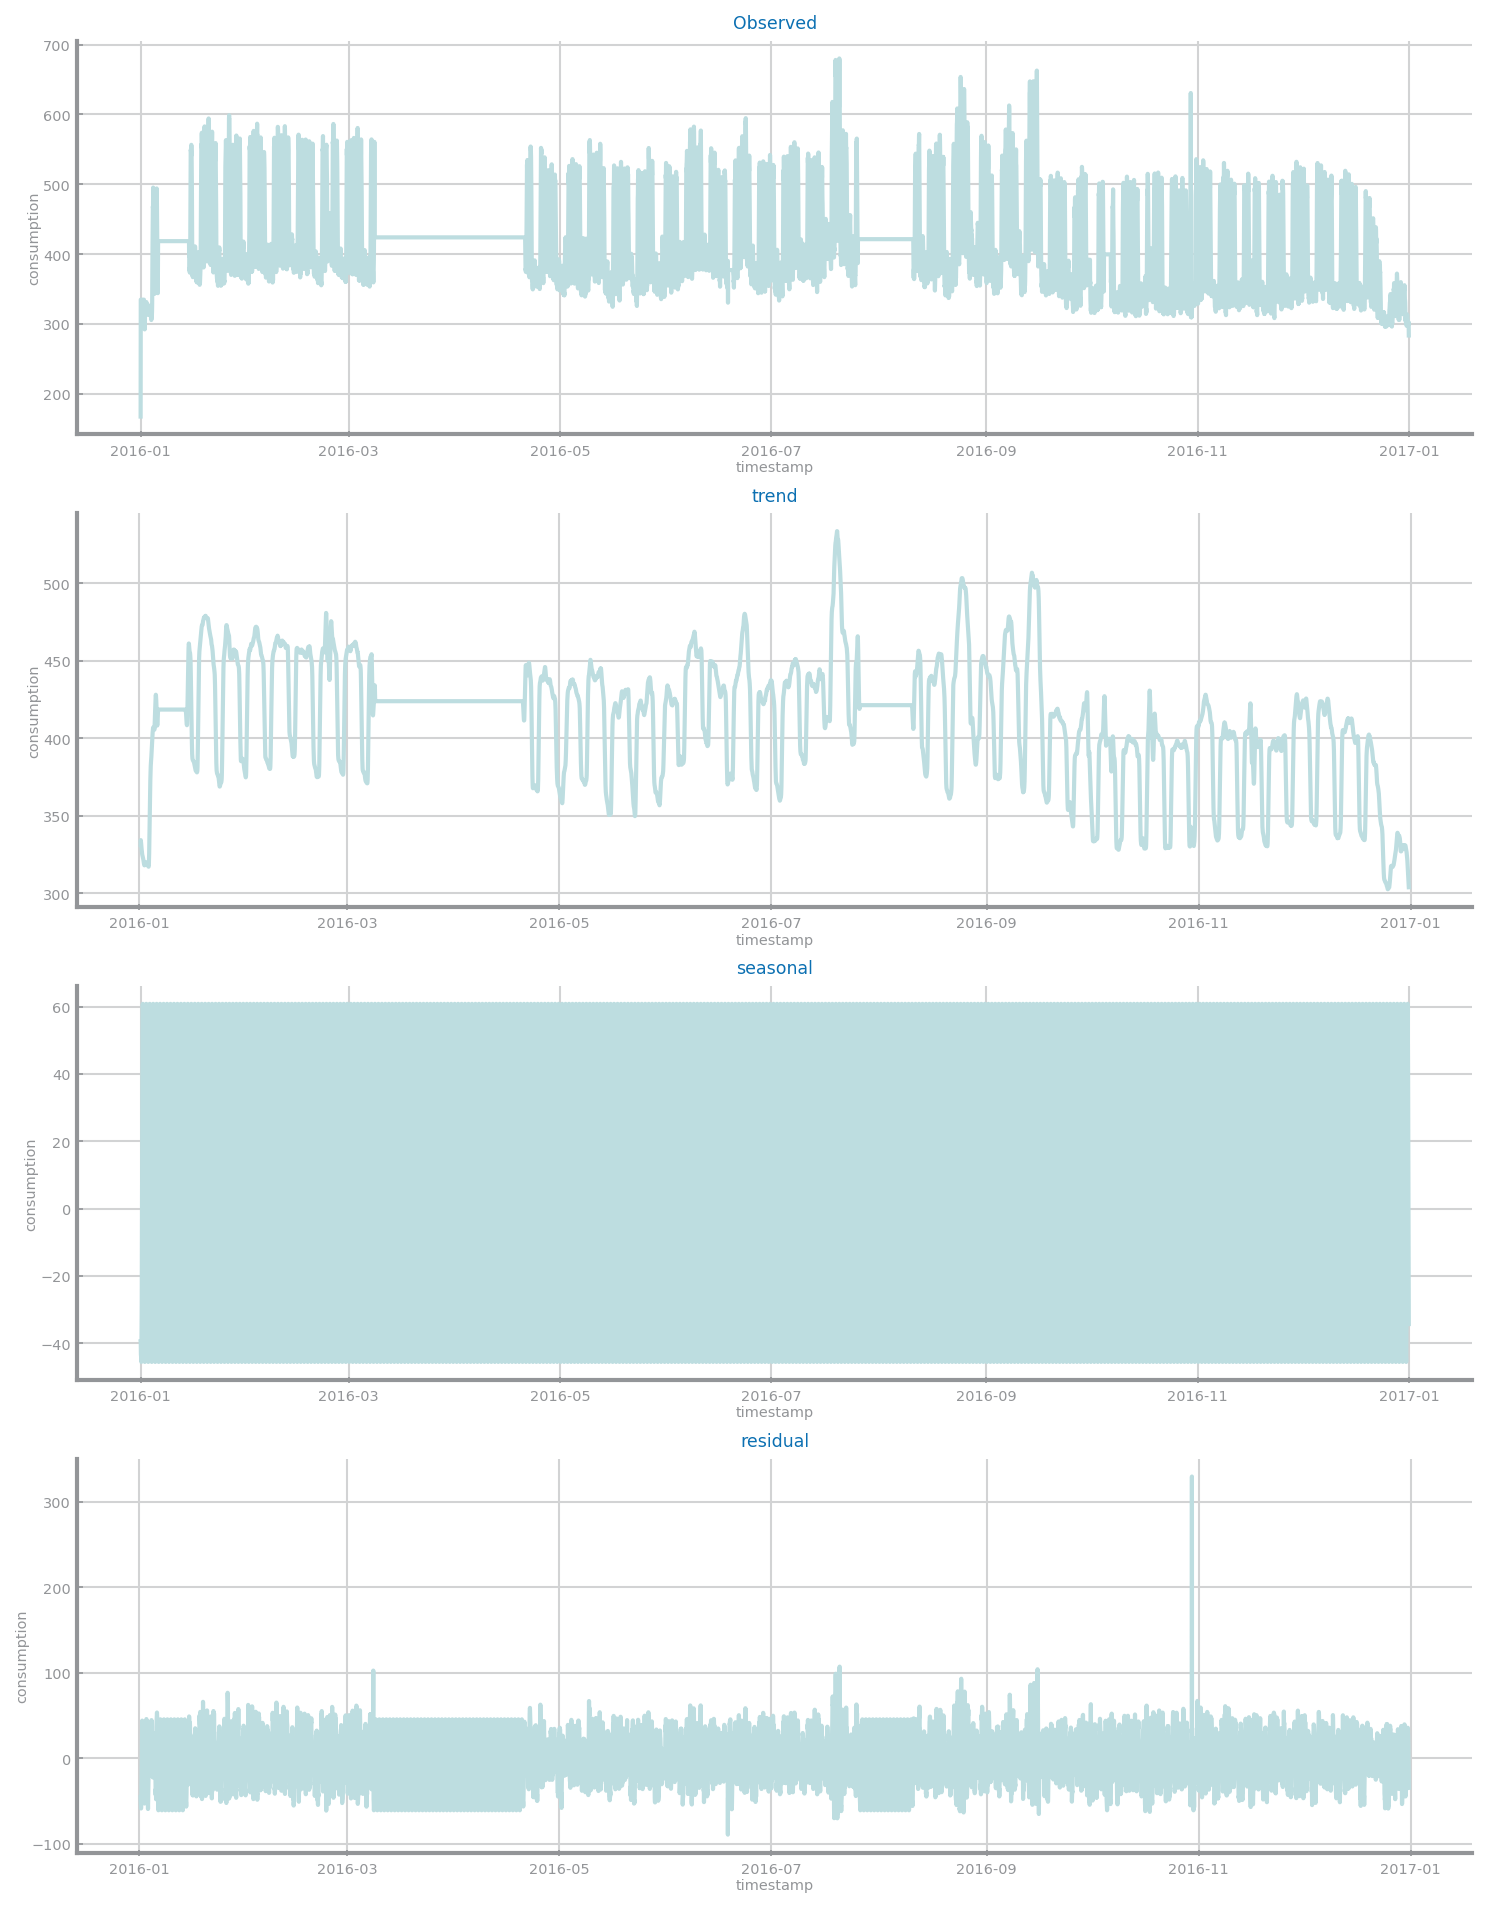

In [2]:
import statsmodels.tsa.seasonal as seasonal

FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2

def plot_components(series: pd.Series, comps: seasonal.DecomposeResult, x_label: str = 'time', y_label:str =''):
    lst = [('Observed', series), ('trend', comps.trend), ('seasonal', comps.seasonal), ('residual', comps.resid)]
    _, axs = plt.subplots(len(lst), 1, figsize=(3*ts.HEIGHT, ts.HEIGHT*len(lst)))
    for i in range(len(lst)):
        axs[i].set_title(lst[i][0])
        axs[i].set_ylabel(y_label)
        axs[i].set_xlabel(x_label)
        axs[i].plot(lst[i][1])

decomposition = seasonal.seasonal_decompose(data, model = "add")
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_components(data, decomposition, x_label='timestamp', y_label='consumption')
plt.show()

# Arima

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


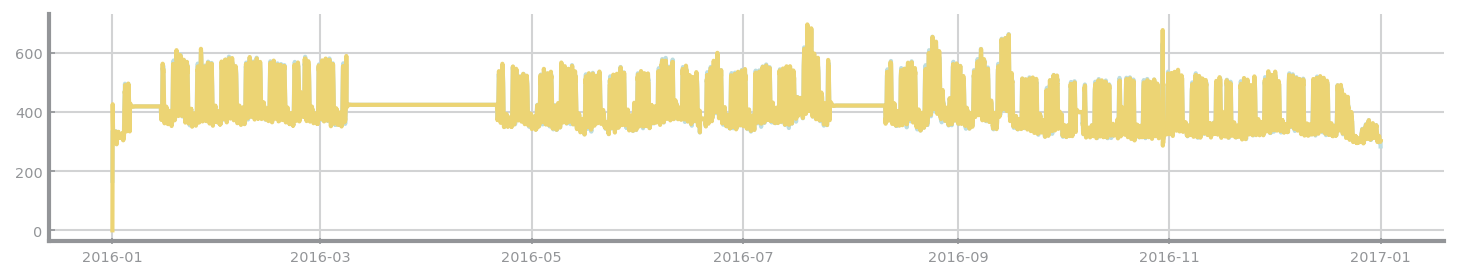

In [3]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = data
model = ARIMA(df, order=(2,1,2))
results = model.fit()
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(df)
plt.plot(results.fittedvalues)
plt.show()

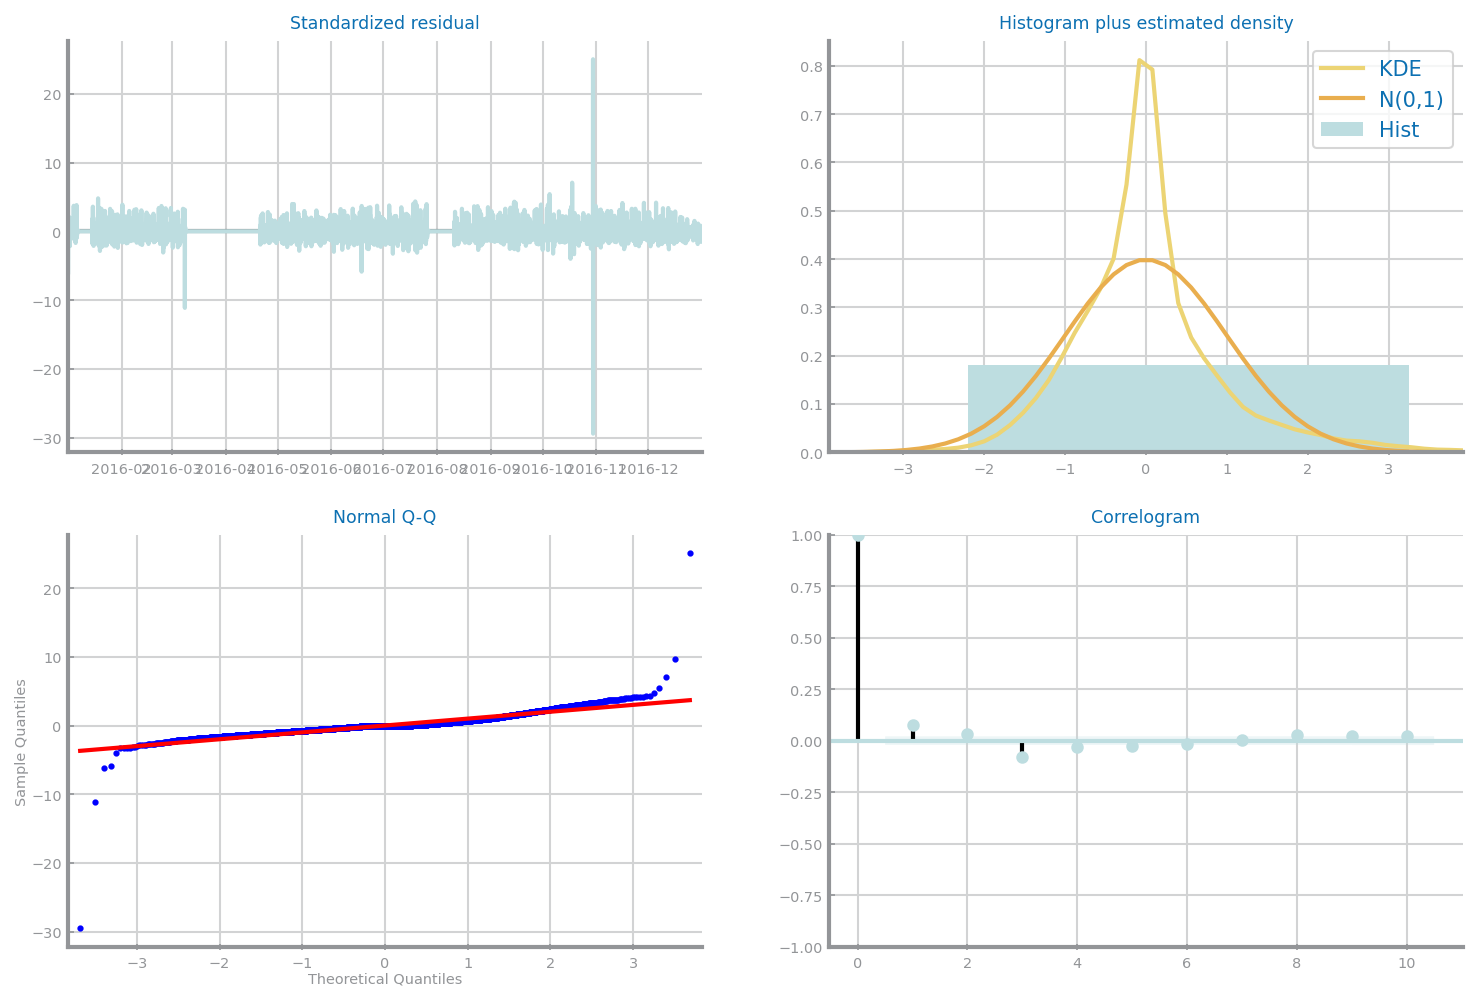

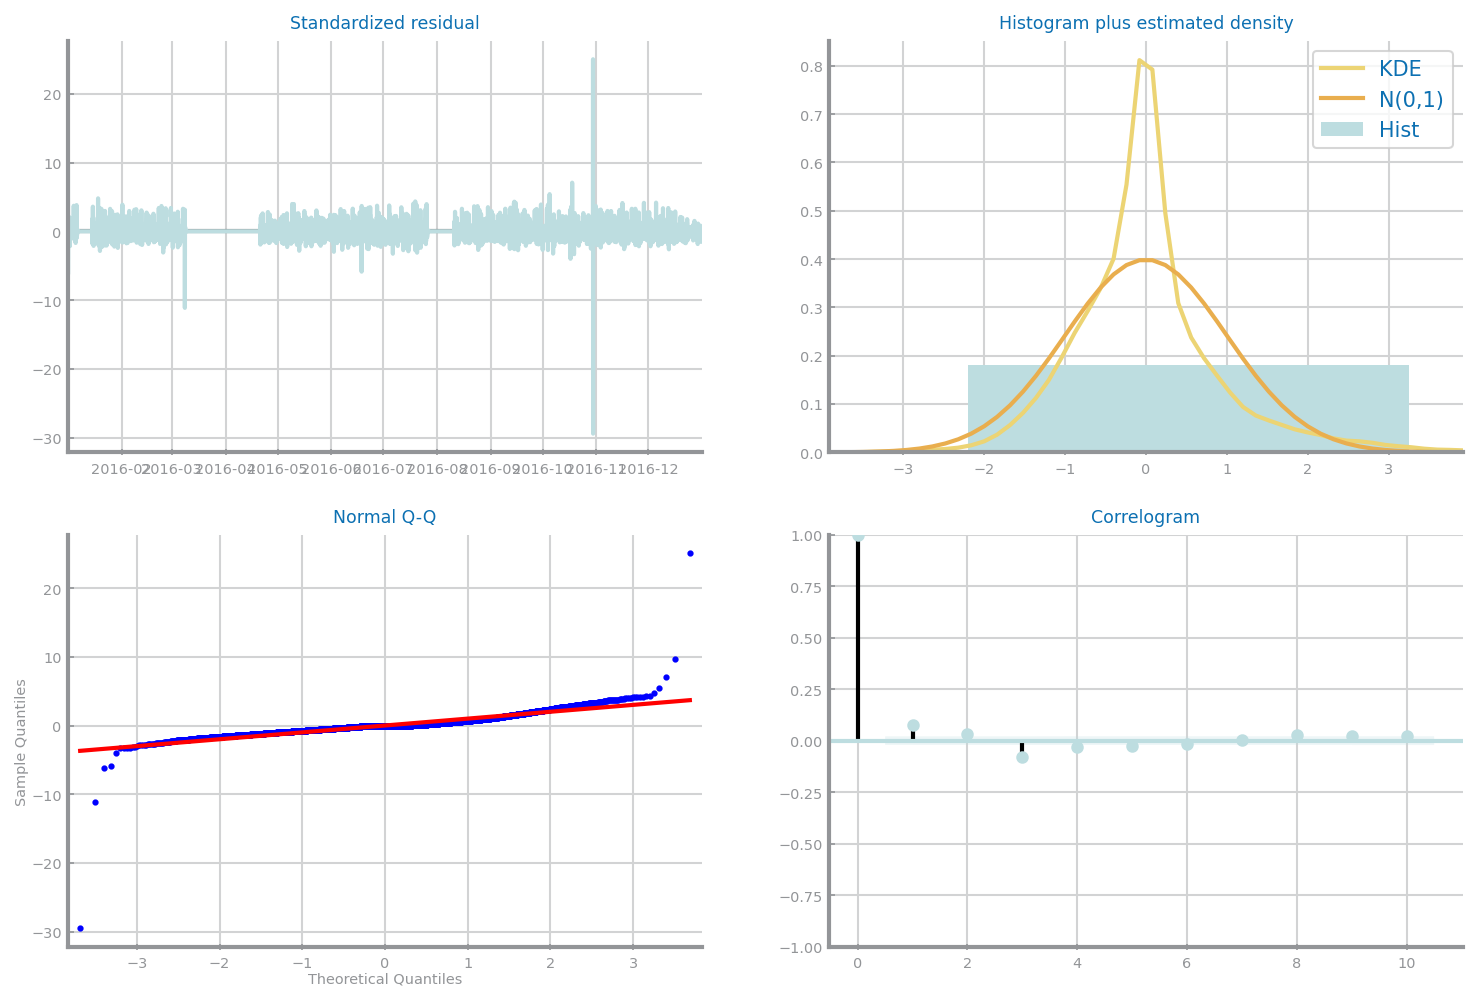

In [4]:
results.plot_diagnostics(figsize=(FIG_WIDTH, 4*FIG_HEIGHT))

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning:

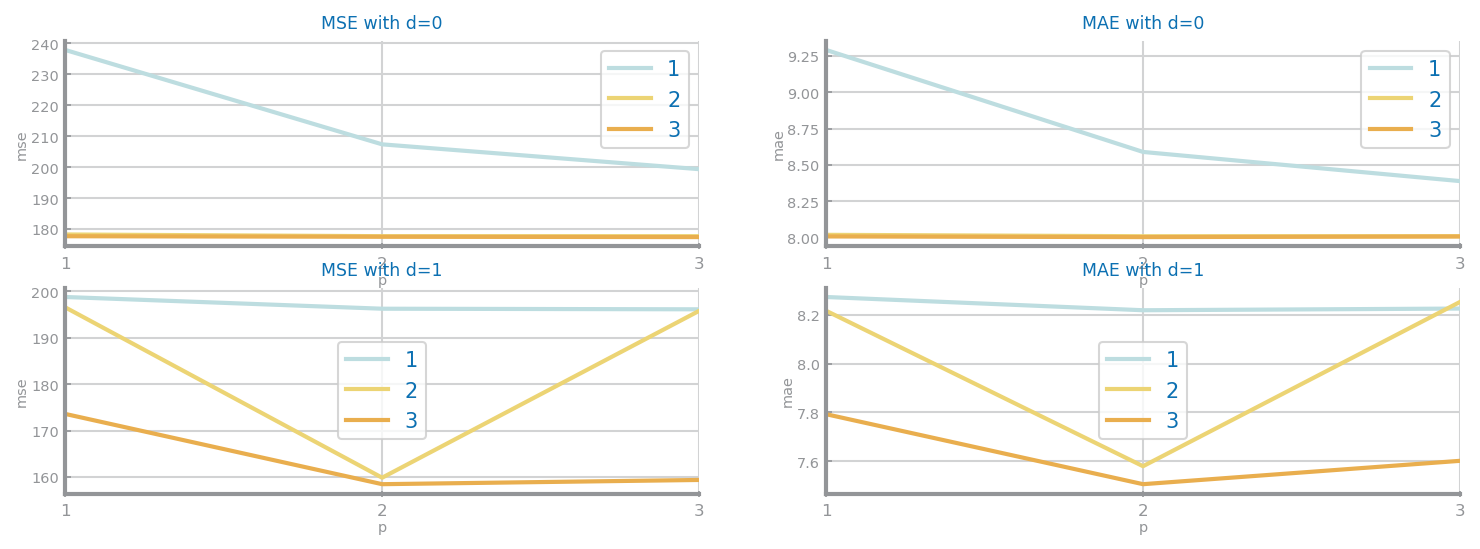

In [5]:
_, axs = plt.subplots(2, 2, figsize=(FIG_WIDTH, 2*FIG_HEIGHT))
params = (1, 2, 3)
for d in (0, 1):
    mse = {}
    mae = {}
    for p in params:
        mse_lst = []
        mae_lst = []
        for q in params:
            mod = ARIMA(df, order=(p, d, q))
            results = mod.fit()
            mse_lst.append(results.mse)
            mae_lst.append(results.mae)
        mse[p] = mse_lst
        mae[p] = mae_lst
    ds.multiple_line_chart(params, mse, ax=axs[d, 0], title=f'MSE with d={d}', xlabel='p', ylabel='mse')
    ds.multiple_line_chart(params, mae, ax=axs[d, 1], title=f'MAE with d={d}', xlabel='p', ylabel='mae')
plt.show()

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


                     meter_reading
timestamp                         
2016-01-01 00:00:00        167.392
2016-01-01 01:00:00        334.784
2016-01-01 02:00:00        334.784
2016-01-01 03:00:00        334.784
2016-01-01 04:00:00        334.784
...                            ...
2016-11-25 04:00:00        323.000
2016-11-25 05:00:00        320.750
2016-11-25 06:00:00        338.375
2016-11-25 07:00:00        341.000
2016-11-25 08:00:00        359.500

[7905 rows x 1 columns]
                     meter_reading
timestamp                         
2016-11-25 10:00:00        434.000
2016-11-25 11:00:00        489.375
2016-11-25 12:00:00        505.125
2016-11-25 13:00:00        493.000
2016-11-25 14:00:00        496.750
...                            ...
2016-12-31 19:00:00        303.000
2016-12-31 20:00:00        299.125
2016-12-31 21:00:00        300.625
2016-12-31 22:00:00        302.125
2016-12-31 23:00:00        283.500

[878 rows x 1 columns]
[376.29480173 393.03338171 408.59962086 4

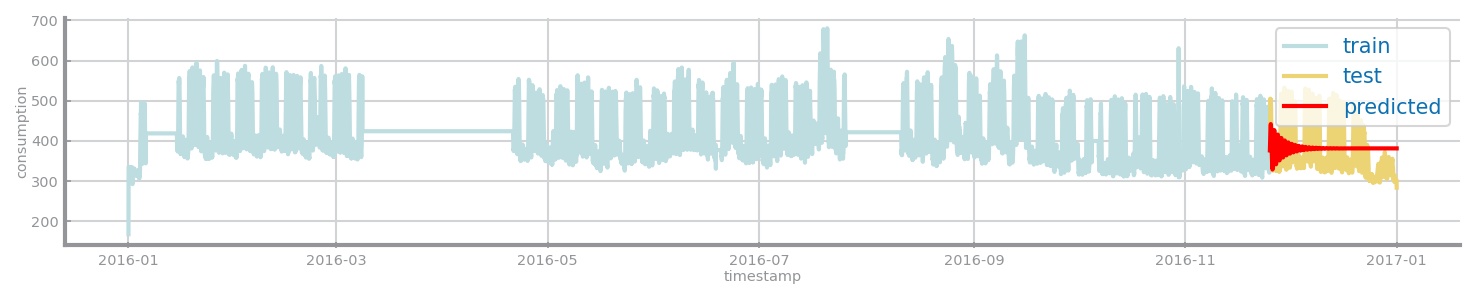

In [8]:
def plot_forecasting(train: pd.Series, test: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.plot(test, label='test')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

p, d, q = 2, 1, 2
n = len(df)
train = df[:n*9//10]
test = df[n*9//10+1:]


mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = len(train), end = len(df)-1)

print(train)
print(test)

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
No handles with labels found to put in legend.
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\Utilizador\anaconda3\lib\site-packages\stats

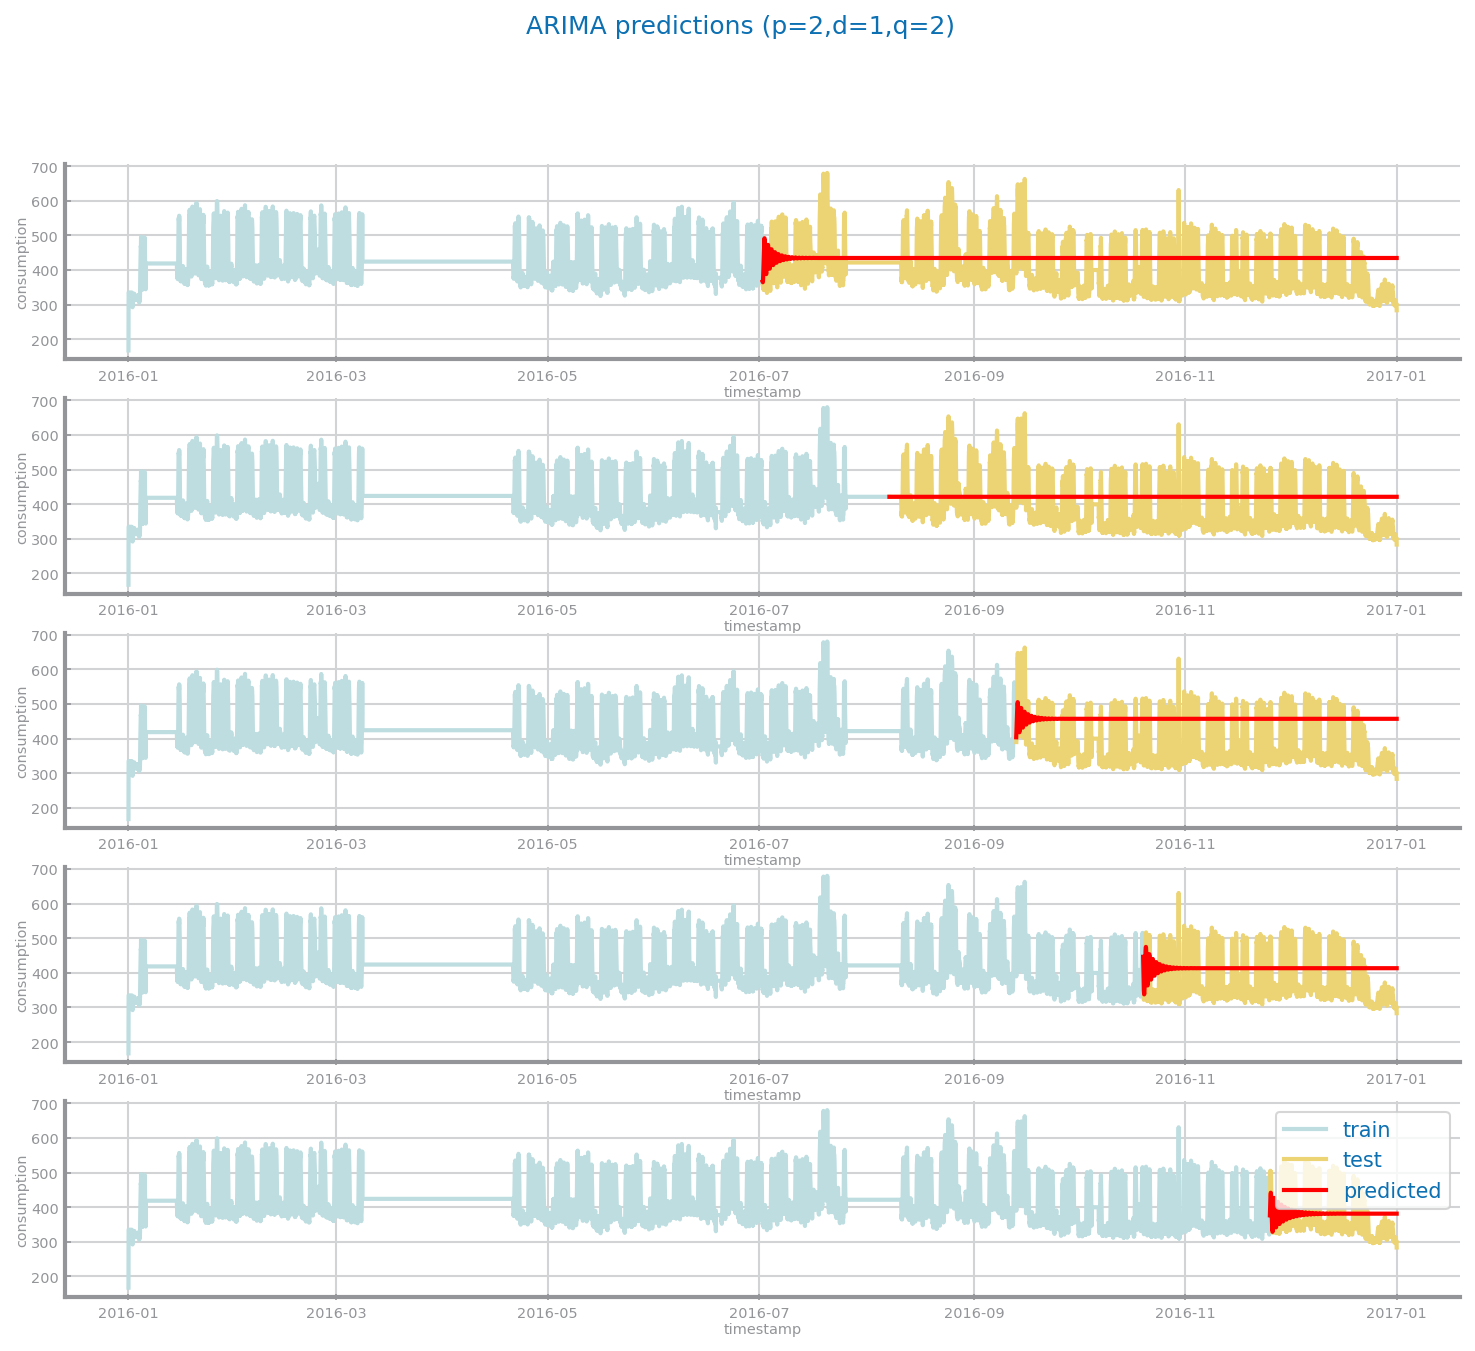

In [7]:
fig, axs = plt.subplots(5, 1, figsize=(FIG_WIDTH, 5*FIG_HEIGHT))
fig.suptitle(f'ARIMA predictions (p={p},d={d},q={q})')
k = 0
for i in range(50, 100, 10):
    train = df[:n*i//100]
    test = df[n*i//100+1:]

    mod = ARIMA(train, order=(p, d, q))
    mod = mod.fit()
    pred = mod.predict(start = len(train), end = len(df)-1)
    plot_forecasting(train, test, pred, ax=axs[k], x_label=x_label, y_label=y_label)
    k += 1
plt.show()